In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
raw_shape_germany = gpd.read_file("../data/eez.shp")
print(raw_shape_germany.crs)
raw_shape_germany.head()

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,mrgid,geoname,mrgid_ter1,pol_type,mrgid_sov1,territory1,iso_ter1,sovereign1,mrgid_ter2,mrgid_sov2,...,iso_sov1,iso_sov2,iso_sov3,un_sov1,un_sov2,un_sov3,un_ter1,un_ter2,un_ter3,geometry
0,5669,German Exclusive Economic Zone,2101,200NM,2101,Germany,DEU,Germany,0,0,...,DEU,None,None,276.0,None,None,276.0,None,None,"MULTIPOLYGON (((14.09923 53.86999, 14.11579 53..."


In [3]:
raw_shape_germany_eez = gpd.read_file("../data/DEU_adm1.shp")
print(raw_shape_germany_eez.crs)
raw_shape_germany_eez.head()

epsg:4326


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,86,DEU,Germany,1,Baden-Württemberg,Land,State,None,None,"MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7..."
1,86,DEU,Germany,2,Bayern,Land,State,None,Bavaria,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
2,86,DEU,Germany,3,Berlin,Land,State,None,None,"POLYGON ((13.17789 52.39032, 13.16575 52.39050..."
3,86,DEU,Germany,4,Brandenburg,Land,State,None,None,"POLYGON ((13.87951 53.50107, 13.87927 53.49908..."
4,86,DEU,Germany,5,Bremen,Land,State,None,None,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2..."


CRS projection WGS84 has the authority code EPSG:4326

<AxesSubplot:>

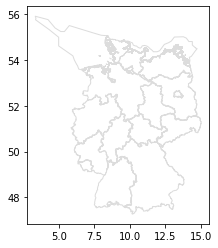

In [4]:
raw_shape_germany = gpd.read_file("../data/eez.shp")
raw_shape_germany_eez = gpd.read_file("../data/DEU_adm1.shp")

shape_germany = raw_shape_germany[['geoname', 'geometry']]
shape_germany_eez = raw_shape_germany_eez[['NAME_1', 'geometry']].rename(columns = {'NAME_1':'geoname'})
shape_germany_complete = pd.concat([shape_germany, shape_germany_eez]).reset_index(drop=True)
shape_germany_complete.plot(color="none", edgecolor='gainsboro')

In [5]:
shape_germany_complete

,geoname,geometry
0,German Exclusive Economic Zone,"MULTIPOLYGON (((14.09923 53.86999, 14.11579 53..."
1,Baden-Württemberg,"MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7..."
2,Bayern,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
3,Berlin,"POLYGON ((13.17789 52.39032, 13.16575 52.39050..."
4,Brandenburg,"POLYGON ((13.87951 53.50107, 13.87927 53.49908..."
5,Bremen,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2..."
6,Hamburg,"POLYGON ((10.07162 53.71823, 10.07150 53.72192..."
7,Hessen,"POLYGON ((9.49877 51.63152, 9.50474 51.62795, ..."
8,Mecklenburg-Vorpommern,"MULTIPOLYGON (((14.26472 53.71069, 14.26472 53..."
9,Niedersachsen,"MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5..."


In [6]:
shape_germany_complete.to_file("../data/shape_germany_complete.shp")

/home/niko/RenewableEnergyForecastML/python_venv_renew/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
